In [22]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
df = pd.read_csv("housing.csv")
df.head()

,Cena,Powierzchnia,Miasto,Liczba pokoi,Rok budowy
0,310000,40.80,Mikolow,1,1959
1,489000,40.84,Mikolow,1,2022
2,540000,60.00,Mikolow,3,1910
3,950000,125.40,Mikolow,4,2025
4,1250000,124.30,Mikolow,4,2025


In [24]:
df_encoded = pd.get_dummies(df, columns=['Miasto'], drop_first=True)
print("Data after One-Hot Encoding:")
print(df_encoded.head())

Data after One-Hot Encoding:
      Cena  Powierzchnia  Liczba pokoi  Rok budowy  Miasto_Katowice  \
0   310000         40.80             1        1959            False   
1   489000         40.84             1        2022            False   
2   540000         60.00             3        1910            False   
3   950000        125.40             4        2025            False   
4  1250000        124.30             4        2025            False   

   Miasto_Mikolow  Miasto_Tychy  
0            True         False  
1            True         False  
2            True         False  
3            True         False  
4            True         False  


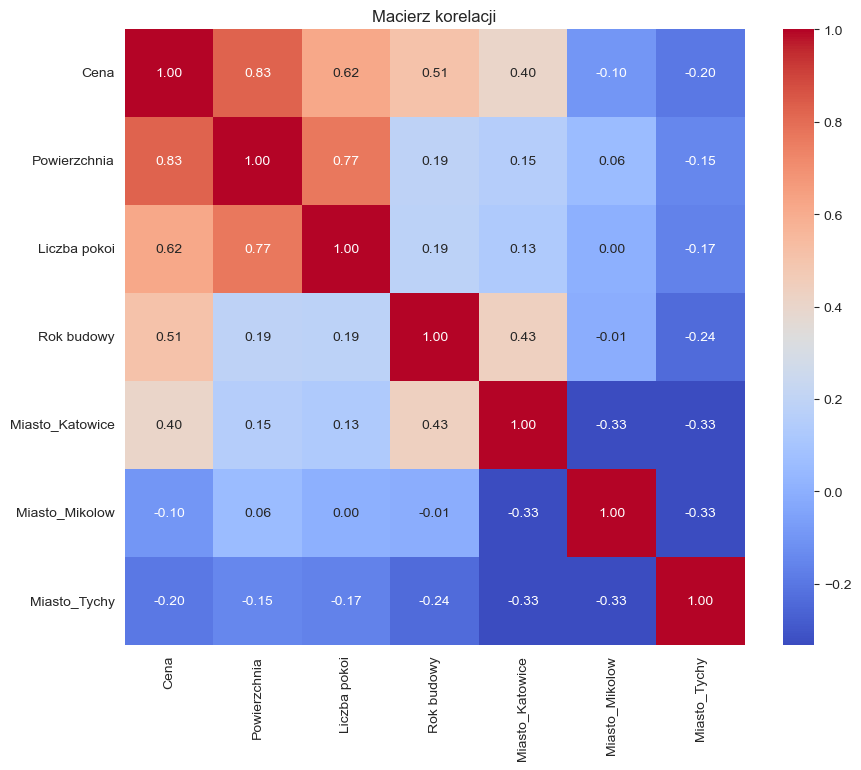

In [25]:
corr_matrix = df_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Macierz korelacji')
plt.show()

In [28]:
target_col = ['Cena', 'Miasto_Katowice', 'Miasto_Mikolow', 'Miasto_Tychy']
X = df_encoded.drop(columns=target_col)
y = df_encoded[target_col]

print("Wybrane zmienne objaśniające:", X.columns.tolist())

Wybrane zmienne objaśniające: ['Powierzchnia', 'Liczba pokoi', 'Rok budowy']


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Rozmiar zbioru uczącego: {X_train.shape}")
print(f"Rozmiar zbioru testowego: {X_test.shape}")

Rozmiar zbioru uczącego: (64, 3)
Rozmiar zbioru testowego: (16, 3)


In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
print("Średnia (zbiór uczący po standaryzacji):", X_train_scaled.mean(axis=0))
print("Odchylenie standardowe (zbiór uczący po standaryzacji):", X_train_scaled.std(axis=0))

Średnia (zbiór uczący po standaryzacji): [-2.08166817e-17  6.93889390e-18  0.00000000e+00]
Odchylenie standardowe (zbiór uczący po standaryzacji): [1. 1. 1.]
